In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from mpl_toolkits.mplot3d import Axes3D

In [2]:
digits=load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
X=digits['data']   # or digits.data
y=digits['target'] # or digits.target and so on
image=digits['images']
label=digits.target_names
print(label)

[0 1 2 3 4 5 6 7 8 9]


In [4]:
y.shape

(1797,)

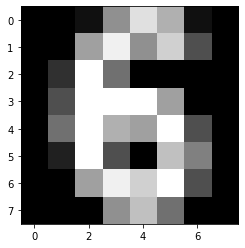

In [5]:
plt.imshow(image[420],cmap='gray')

In [6]:
image=image.reshape(-1,64)

In [7]:
X=digits['data']
print('Image reshaped: ',image.shape)
print('X shape: ',X.shape)
print('Y shape: ',y.shape)

Image reshaped:  (1797, 64)
X shape:  (1797, 64)
Y shape:  (1797,)


In [8]:
#Calculate mean of the dataset
#Mean Vector dimension (1,64)
#Axis 1 is row and axis 0 is column

col_mean=np.mean(image,axis=0)
col_mean.shape

(64,)

In [9]:
# Subtract mean of each column from that column
data_norm = image - col_mean

In [10]:
image.shape[1]

64

In [11]:
# Calculate covariance matrix from subtracted mean
# cov= 1/(image.shape[1])*(sum(n))   #Incorrect

cov=np.dot(data_norm.T,data_norm)/data_norm.shape[0]
print(cov.shape)
covariance=np.cov(data_norm.T)

(64, 64)


In [12]:
covariance

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.8229975 ,  2.40099498, ..., -0.1598953 ,
         0.09851423, -0.07406182],
       [ 0.        ,  2.40099498, 22.60837352, ..., -1.15544033,
         1.41203571,  0.72988047],
       ...,
       [ 0.        , -0.1598953 , -1.15544033, ..., 34.81734839,
        15.64854441,  2.87558266],
       [ 0.        ,  0.09851423,  1.41203571, ..., 15.64854441,
        16.73258202,  4.72078588],
       [ 0.        , -0.07406182,  0.72988047, ...,  2.87558266,
         4.72078588,  3.46005282]])

In [13]:
from scipy.linalg import eigh

eigen_val=eigh(covariance)

In [14]:
eigen_val,eigen_vec=eigh(covariance)
print(eigen_val.shape)
eigen_vec.shape

(64,)


(64, 64)

In [15]:
eigen_vec[:,:2]

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [-4.60911333e-16, -7.72995727e-15],
       [ 7.45352599e-16, -1.13460725e-15],
       [-2.90111718e-16,  6.68361623e-16],
       [-6.64842655e-17, -6.64023043e-16],
       [ 1.76162404e-15, -2.56349904e-15],
       [-1.12982083e-14,  2.26536653e-15],
       [ 4.09013815e-14, -8.88044262e-13],
       [-7.33260401e-17, -7.25750169e-15],
       [ 3.07698426e-16, -2.86832824e-16],
       [ 2.96030667e-16, -5.73098439e-15],
       [-6.60103014e-17,  1.77077793e-15],
       [ 3.80699805e-16,  1.06678233e-15],
       [-2.08102162e-15,  9.32409326e-16],
       [ 1.85797933e-14,  6.44115146e-15],
       [-4.01384989e-13,  4.90626473e-12],
       [ 1.15997121e-15,  5.63439398e-15],
       [-5.55761817e-16,  3.30685929e-15],
       [-2.99486494e-16,  7.87086313e-15],
       [ 7.27955011e-17, -1.68963636e-15],
       [-5.89338470e-16, -1.75187207e-15],
       [ 2.57908139e-15, -1.04505106e-15],
       [-5.

   ## Dimensional Reduction 

### Task
1. Reverse both eigen values and eigen vector.
2. Number of components=2
3. No eigen values= 2 and eigen vector= 2
4. Lower Dimension: data * eigen vector -> (dimension (1797,2))
5. Visualize lower dimension
6. Find the number of components Formula


In [16]:
def calc_PCA(n,eigen_val,eigen_vec):

    e_val=eigen_val[::-1]
    values=e_val[:n]
    
    e_vec=eigen_vec[:,::-1]
    vectors=e_vec[:, :n]
    
    dim_low=np.matmul(image,vectors)

    return dim_low

In [23]:
def plot_PCA(n,data): 
#     two_comp_data=pd.DataFrame(data=data,columns=('Principal 1','Principal 2','Principal 3'))    
    fig=plt.figure(figsize=(10,8))    
    colors=['red','blue','green','yellow','violet','magenta','purple','brown','pink','orange']

    
    if(n==2):
        two_comp_data=pd.DataFrame(data=data,columns=('Principal 1','Principal 2'))    

        for label in set(y):
            d=two_comp_data[y==label]
            plt.scatter(d['Principal 1'],d['Principal 2'], label=label,color=colors[label])
            plt.title('2D Plot of two principals')

            
    elif(n==3):
        two_comp_data=pd.DataFrame(data=data,columns=('Principal 1','Principal 2','Principal 3'))    

        ax=Axes3D(fig,elev=20,azim=-50)
        for label in set(y):
            d=two_comp_data[y==label]
#             plt.title('3D Plot of three principals')
            ax.scatter(d['Principal 1'],d['Principal 2'],d['Principal 3'],label=label,color=colors[label])
        ax.set_zlabel('Principal 3')
    
    else:
        print('Cannot draw graph with n>2')
    
    plt.xlabel('Principal 1')
    plt.ylabel('Principal 2')
    plt.show()
    


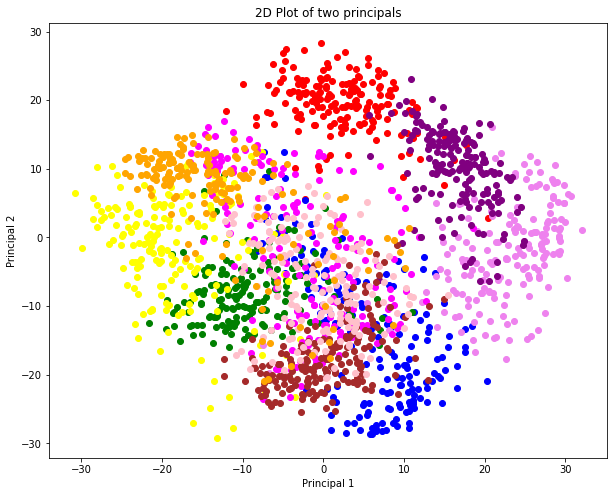

In [24]:
z=calc_PCA(2,eigen_val,eigen_vec)
plot_PCA(2,z)

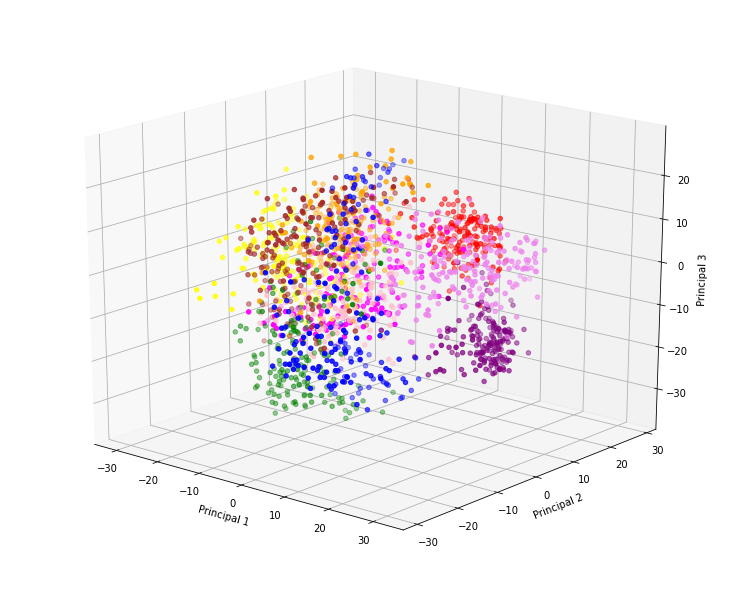

In [25]:
z=calc_PCA(3,eigen_val,eigen_vec)
plot_PCA(3,z)

"How many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [26]:
significance=[np.abs(i)/np.sum(eigen_val) for i in eigen_val]

In [27]:
sum(significance)

0.9999999999999999

In [22]:
# total =sum(eigen_val)

# var_exp=[(i/total)*100 for i in eigen_val]
# cum_var_exp=np.cumsum(var_exp)

# plot1=dict(
#     type='bar',
#     x=['PC %s'%i for i in range(40)],
#     y=var_exp,
#     name='Individual'
# )

# plot2=dict(
#     type='scatter',
#     x=['PC %s'%i for i in range(40)],
#     y=cum_var_exp,
#     name='Cumulative'
# )

# data=[d['Principal 1'],d['Principal 2']]


# layout=dict(
#     title='Explained variance by different principal components',
#     yaxis=dict(
#         title='Explained variance in percent'
#     ),
#     annotations=list([
#         dict(
#             x=1.16,
#             y=1.05,
#             xref='paper',
#             yref='paper',
#             text='Explained Variance',
#             showarrow=False,
#         )
#     ])
# )

# fig = dict(data=dim_low, layout=layout)
# py.iplot(fig, filename='selecting-principal-components')